# Validation des résultats

In [1]:
import pandas as pd
import yfinance as yf
import yahoofinancials
import numpy as np
import math
import matplotlib

In [2]:
def get_tickertop10(fichiercsv):
    Tabl = pd.read_csv(fichiercsv, sep=';', index_col=0)
    return Tabl

In [3]:
def get_rendement(tickers,Date_debut,Date_fin):
    Tableau_rendement=pd.DataFrame()
    for ticker in tickers:
        Tableau_rendement[ticker] = yf.download(ticker,start= Date_debut,end=Date_fin,progress=False,interval='1mo')['Adj Close'].dropna()
        Tableau_rendement[ticker] = Tableau_rendement[ticker].pct_change(periods=3)*100
    return Tableau_rendement

In [4]:
def comparaison(index,tickers,Date_debut,Date_fin):
    Tableau_rendement_ref = get_rendement([index],Date_debut,Date_fin)
    Tableau_rendement_top10 = get_rendement(tickers,Date_debut,Date_fin)
    nombre=0
    for i in range(len(np.transpose(Tableau_rendement_top10))):
        if Tableau_rendement_top10.iloc[-1,i]!='nan':
            nombre+=1
    return Tableau_rendement_top10,nombre,Tableau_rendement_ref

In [5]:
tabl = get_tickertop10('donnees_top10_1.csv')
Tableau_final = []
Tableau_final1=pd.DataFrame()
nombres=[]
reference=[]

In [6]:
top10 = tabl.iloc[:,2:]
date_complet = tabl.iloc[:,0:2]
i=0
while i<(len(tabl)-1):
    Tableau_global,nombre,ref = comparaison('^GSPTSE',top10.iloc[i,:],date_complet.iloc[(i+1),0],date_complet.iloc[(i+1),1])
    allo = np.array(Tableau_global.iloc[-1,:])
    Tableau_final.append(Tableau_global.iloc[-1,:].sum()/nombre)
    reference.append(ref.iloc[-1,0])
    nombres.append(nombre)
    Tableau_final1[i]=allo
    i+=1
Tableau_fin = pd.DataFrame(np.transpose([Tableau_final,reference]),columns = ['Top10','TSX'])


1 Failed download:
- DDC.TO: No data found for this date range, symbol may be delisted

1 Failed download:
- BPO-PR.TO: Data doesn't exist for startDate = 1270094400, endDate = 1278561600

1 Failed download:
- BPY-UN.TO: Data doesn't exist for startDate = 1270094400, endDate = 1278561600

1 Failed download:
- BEP-UN.TO: No data found for this date range, symbol may be delisted

1 Failed download:
- CEF.TO: Data doesn't exist for startDate = 1270094400, endDate = 1278561600

1 Failed download:
- ZWB.TO: Data doesn't exist for startDate = 1277956800, endDate = 1286510400

1 Failed download:
- ZPR.TO: Data doesn't exist for startDate = 1277956800, endDate = 1286510400

1 Failed download:
- ZSP.TO: Data doesn't exist for startDate = 1277956800, endDate = 1286510400

1 Failed download:
- ZDY.TO: Data doesn't exist for startDate = 1277956800, endDate = 1286510400

1 Failed download:
- REF-UN.TO: Data doesn't exist for startDate = 1293858000, endDate = 1302235200

1 Failed download:
- ZIC.TO

In [7]:
Base = np.transpose(Tableau_final1)
Base

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,-10.110804,13.125584,-1.511023,-18.301105,NaN,7.389008
1,18.744354,16.519268,2.537506,NaN,5.543242,NaN,NaN,6.537466,1.329187,NaN
2,10.357150,16.897406,31.689217,14.901044,32.903978,17.101442,-10.427388,-3.135556,8.748832,13.954639
3,8.498961,9.086733,-0.118064,-6.176357,NaN,NaN,NaN,6.098019,NaN,2.547770
4,-0.772946,-1.636425,5.610894,141.207076,6.997545,-1.298687,6.822074,1.863347,2.944193,-26.123951
5,4.329378,-32.516434,8.534066,-0.767342,-5.915017,-2.097325,NaN,NaN,NaN,NaN
6,-0.735292,3.143432,2.190899,4.281086,NaN,NaN,NaN,-7.437647,6.976745,NaN
7,22.678110,8.226696,-12.990725,NaN,7.391241,1.855885,-3.394569,25.771860,-8.366302,12.984414
8,9.684927,NaN,-13.074821,-3.601551,1.849831,-7.877926,-3.597696,24.905382,NaN,NaN
9,NaN,2.044825,-1.181085,9.749308,-8.396951,NaN,0.325130,6.193390,NaN,NaN


In [8]:
for i in range(len(Base)):
    for j in range(len(np.transpose(Base))):
        Base.iloc[i,j] = Base.iloc[i,j] - Tableau_fin.iloc[i,1]

In [9]:
Base

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,-6.038148,17.198240,2.561633,-14.228449,NaN,11.461664
1,10.524710,8.299624,-5.682138,NaN,-2.676402,NaN,NaN,-1.682178,-6.890457,NaN
2,3.448141,9.988398,24.780208,7.992035,25.994969,10.192433,-17.336397,-10.044565,1.839823,7.045630
3,5.600498,6.188270,-3.016528,-9.074821,NaN,NaN,NaN,3.199555,NaN,-0.350693
4,6.392450,5.528971,12.776291,148.372472,14.162942,5.866710,13.987470,9.028744,10.109589,-18.958555
5,9.686410,-27.159401,13.891098,4.589691,-0.557984,3.259707,NaN,NaN,NaN,NaN
6,-2.368487,1.510238,0.557705,2.647892,NaN,NaN,NaN,-9.070841,5.343551,NaN
7,23.959008,9.507594,-11.709827,NaN,8.672139,3.136783,-2.113671,27.052758,-7.085404,14.265312
8,14.793650,NaN,-7.966098,1.507172,6.958554,-2.769203,1.511027,30.014105,NaN,NaN
9,NaN,-4.455130,-7.681039,3.249353,-14.896905,NaN,-6.174824,-0.306565,NaN,NaN


In [10]:
tabl

,Date_debut,Date_fin,1,2,3,4,5,6,7,8,9,10
1,2010-01-01,2010-04-08,DDC.TO,BPO-PR.TO,BPY-UN.TO,BEP-UN.TO,AAV.TO,DGC.TO,AFN.TO,BB.TO,CEF.TO,CAR-UN.TO
2,2010-04-01,2010-07-08,BTE.TO,ABX.TO,ZAG.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZSP.TO,ZCN.TO,ZCS.TO,ZDY.TO
3,2010-07-01,2010-10-08,BLX.TO,CHE-UN.TO,BTE.TO,CLS.TO,BIR.TO,ARX.TO,CSH-UN.TO,ABX.TO,CAS.TO,CCL-B.TO
4,2010-10-01,2011-01-08,CM.TO,CNR.TO,CNQ.TO,CP.TO,REF-UN.TO,ZIC.TO,ZEA.TO,ZUE.TO,ZSP.TO,ZCN.TO
5,2011-01-01,2011-04-08,GIB-A.TO,CAE.TO,ALA.TO,ATD-B.TO,AGI.TO,ARX.TO,AQN.TO,BTO.TO,AP-UN.TO,AIF.TO
6,2011-04-01,2011-07-08,BAD.TO,BYD-UN.TO,CU.TO,BMO.TO,CWB.TO,BNS.TO,MOMAN,AKSJNJN,KJNKJSAN,KJANFKJSAN
7,2011-07-01,2011-10-08,GIB-A.TO,D-UN.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZLB.TO,AC.TO,CEU.TO,CGG.TO,DRG-UN.TO
8,2011-10-01,2012-01-08,CCL-B.TO,BAM-A.TO,DGC.TO,CRT-UN.TO,BNS.TO,BMO.TO,CPX.TO,BAD.TO,EIT-UN.TO,BEI-UN.TO
9,2012-01-01,2012-04-08,BEI-UN.TO,ZDY.TO,BBD-B.TO,CTC-A.TO,CU.TO,CWB.TO,BAD.TO,ARX.TO,KJNKJSAN,KJANFKJSAN
10,2012-04-01,2012-07-08,AGU.TO,DOL.TO,AFN.TO,BB.TO,AAV.TO,CEF.TO,ZAG.TO,ZWB.TO,KJNKJSAN,KJANFKJSAN


In [11]:
Tableau_comparatif = Tableau_fin['Top10']-Tableau_fin['TSX']

In [12]:
Tableau_fin

,Top10,TSX
0,-0.940834,-4.072656
1,5.121102,8.219644
2,13.299076,6.909009
3,1.993706,2.898464
4,13.561312,-7.165396
5,-2.843267,-5.357033
6,0.841922,1.633194
7,5.415661,-1.280898
8,0.828815,-5.108723
9,0.873462,6.499954


In [13]:
Tableau_comparatif.sum()

56.57182061515318

In [14]:
Tableau_comparatif.std()

5.66824393385112

In [15]:
Tableau_comparatif

0      3.131822
1     -3.098542
2      6.390067
3     -0.904757
4     20.726708
5      2.513765
6     -0.791272
7      6.696559
8      5.937538
9     -5.626493
10     5.686575
11     5.515428
12     3.097612
13    15.443830
14     4.909099
15    -1.315060
16    -2.070515
17     1.492781
18    -2.537722
19     1.765094
20     5.607795
21     2.125533
22     4.216804
23    -4.934840
24     5.855590
25    -2.568115
26     1.563940
27     4.900122
28    -9.578073
29    -3.626390
30     2.015025
31     0.131151
32    -2.675598
33    -0.263039
34    -6.702761
35     2.654158
36     1.326064
37    -1.436290
38    -1.953950
39    -7.047823
dtype: float64

Text(0, 0.5, 'Rendement(%)')

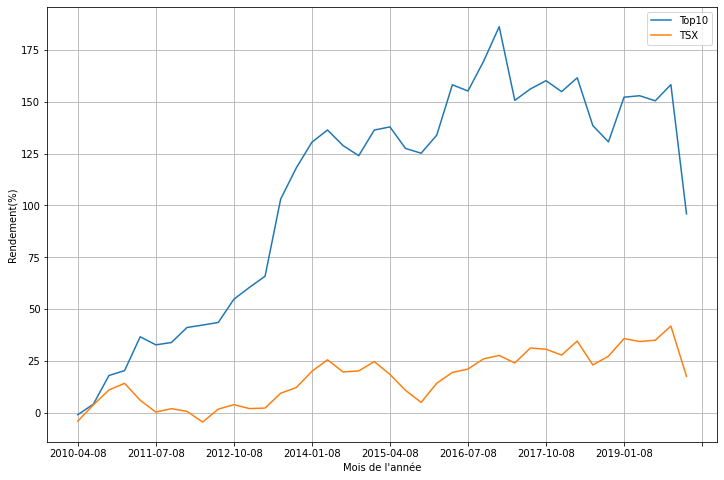

In [20]:
Tableau_fin.index = tabl.iloc[0:-1,1]
ax=(((Tableau_fin+100)/100).cumprod()*100-100).plot(grid='on',figsize=(12, 8))
ax.set_xlabel("Mois de l'année")
ax.set_ylabel("Rendement(%)")

In [17]:
index = tabl.iloc[0:-1,1]